In [ ]:
!ls -laFh

total 393M
drwxr-xr-x 1 root root 4.0K Feb 22 18:56 ./
drwxr-xr-x 1 root root 4.0K Feb 22 18:55 ../
drwxr-xr-x 4 root root 4.0K Feb 21 14:37 .config/
-rw-r--r-- 1 root root 256M Feb 22 19:02 merged.18k.dihedrals.csv
-rw-r--r-- 1 root root 138M Feb 22 18:59 merged.18k.dihedrals.filtered.for.betasheet.fit.csv
drwxr-xr-x 1 root root 4.0K Feb 21 14:37 sample_data/


In [ ]:
#inputFile='derby.second.sampled.b.csv'
#inputFile='alphaHelicesFilteredOut.merged.csv'
#inputFile='alphaHelices.GT100.merged.fixed.csv'
#inputFile='merged.18k.dihedrals.filtered.for.betasheet.fit.csv'
inputFile='merged.11k.dihedrals.CAS.csv'
#inputFile='merged.11k.dihedrals.CAS.Filtered.No.alphaHelix.Actual.csv'

132.79 89.84


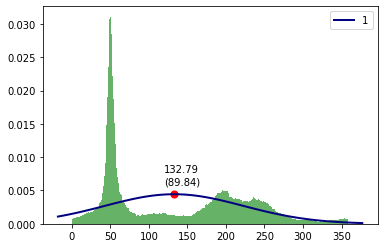

49.13 13.4
204.12 61.21


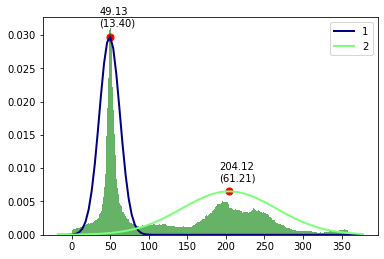

49.06 13.33
240.8 50.55
182.94 56.94


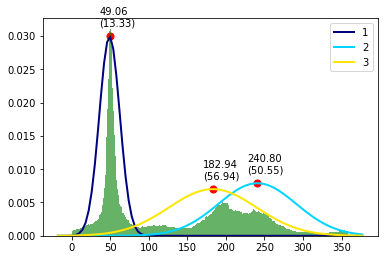

117.4 28.99
48.65 13.4
266.52 46.74
207.69 28.86


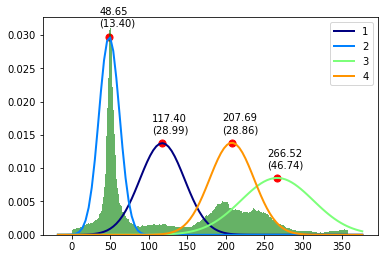

320.0 26.99
48.81 13.55
193.23 19.12
117.85 24.11
244.07 20.28


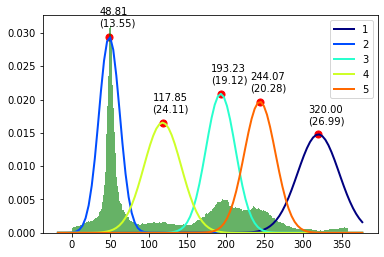

220.27 16.34
48.8 13.53
185.89 16.44
256.01 17.13
116.87 23.23
325.67 23.35


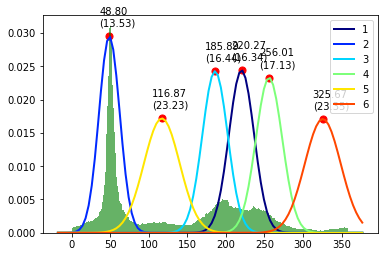

326.27 23.04
48.7 13.4
225.6 14.58
150.47 19.01
257.47 17.1
191.79 13.53
104.72 16.46


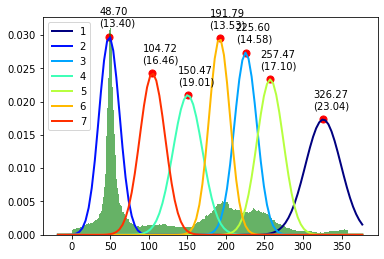

23.56 11.97
249.75 18.41
125.2 19.13
210.44 15.75
50.2 5.58
322.65 25.3
182.26 15.51
74.53 15.67


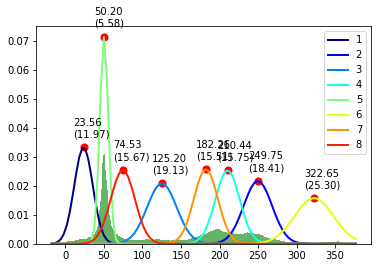

50.28 4.81
225.46 13.45
169.43 16.88
290.7 23.4
195.93 12.47
109.23 26.96
251.63 14.0
346.29 8.79
45.69 21.94


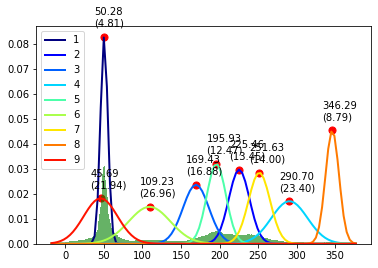

170.01 13.86
50.12 5.4
287.91 18.18
225.5 11.46
119.42 17.46
251.92 12.01
24.09 12.17
196.88 10.83
342.96 11.39
71.83 13.31


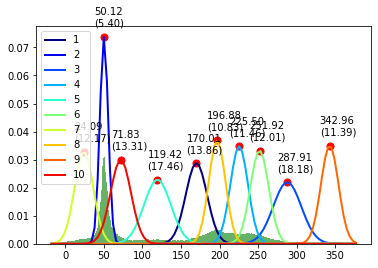

40.31 7.89
225.1 12.01
166.72 14.88
288.11 18.63
195.64 11.54
50.46 4.64
116.13 17.12
69.09 11.92
251.85 12.25
17.57 9.57
343.31 11.11


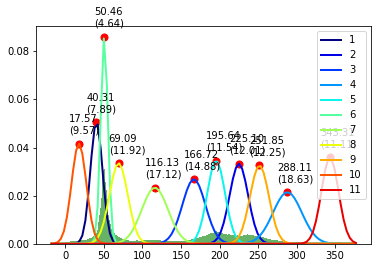

268.58 10.19
50.03 5.32
182.09 10.05
111.26 14.47
225.25 8.81
344.59 9.95
70.13 10.92
24.03 12.06
151.56 14.26
246.51 8.59
301.89 13.73
202.22 8.58


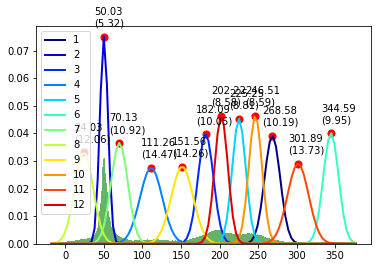

93.02 12.34
230.85 9.52
161.25 12.0
49.8 4.26
342.22 11.99
206.44 8.86
287.44 17.38
124.13 12.64
35.14 6.78
253.96 10.81
63.21 7.91
186.82 9.24
14.5 8.01


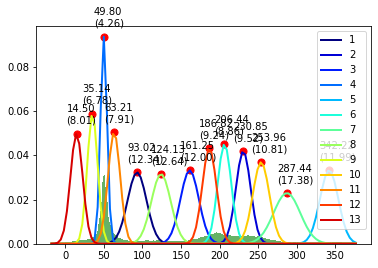

193.91 7.81
62.91 7.32
257.15 10.46
343.0 11.32
116.88 10.69
35.17 6.78
213.65 8.11
145.78 10.91
290.71 16.85
49.79 4.24
14.5 8.01
88.81 11.12
235.7 8.49
173.23 8.68


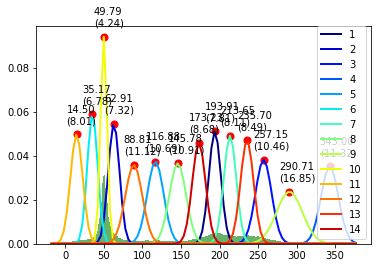

175.31 9.76
41.37 6.52
270.88 9.53
114.98 10.88
214.81 7.39
344.89 9.72
251.09 7.35
62.02 7.05
18.66 9.91
144.73 11.93
195.75 7.64
86.6 10.97
302.74 13.8
233.94 7.04
50.12 3.78


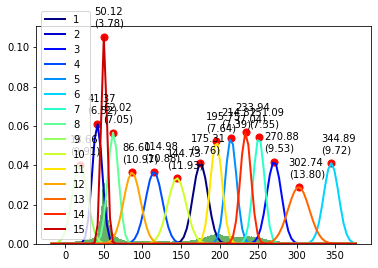

49.68 4.73
236.57 6.04
172.39 8.5
327.25 10.28
115.99 10.64
271.26 8.43
205.25 6.0
88.67 10.7
25.41 12.56
144.71 10.88
63.9 7.44
252.47 6.69
349.34 6.65
190.89 6.51
297.82 10.59
220.58 5.88


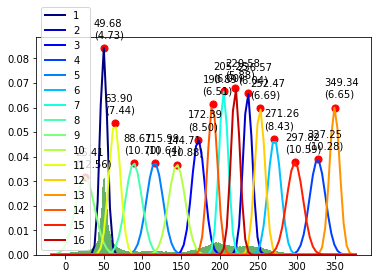

93.9 9.3
275.21 9.38
201.23 5.91
54.37 3.97
345.13 9.51
142.7 10.14
236.07 7.22
15.41 8.4
169.21 8.12
48.42 3.31
117.2 9.3
68.04 7.35
254.11 7.79
187.21 6.57
305.95 12.47
217.49 6.61
36.64 6.5


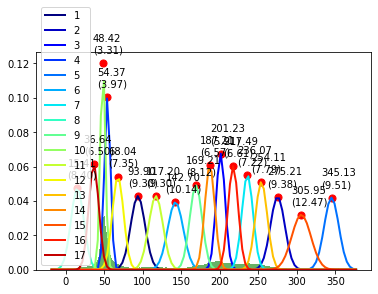

285.46 9.74
53.3 3.87
200.38 5.8
140.83 10.24
247.65 6.78
33.88 6.78
91.57 9.44
168.16 8.35
215.72 5.88
346.1 8.79
47.82 3.52
66.76 7.02
264.57 7.89
186.29 6.59
312.46 11.35
115.34 9.39
231.97 6.35
13.34 7.45


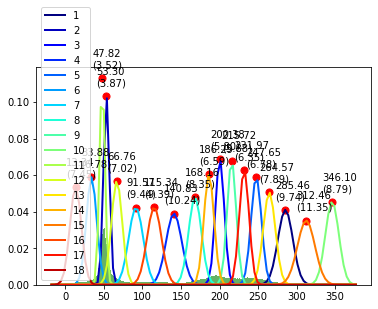

51.02 3.36
199.2 5.37
263.45 7.97
122.68 9.11
312.37 11.38
169.84 7.25
229.9 6.47
13.18 7.38
76.91 7.25
32.38 6.36
284.56 10.0
246.02 7.14
186.07 5.85
147.11 9.01
61.52 4.97
213.84 5.87
100.43 8.66
346.1 8.79
45.26 3.51


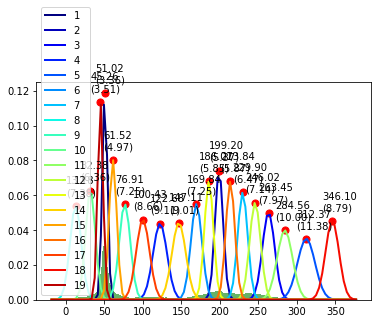

In [ ]:
#@title gauss fits
import pandas as pd
import numpy as np
from scipy.stats import norm
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

def plotMixtureGaussFits(inputFile, n_components=6):
    """
    Plot histogram of data with fitted Gaussian mixture model.

    Args:
    - inputFile (str): Path to input csv file
    - n_components (int): Number of components in the Gaussian mixture model

    Returns:
    - None (displays plot)
    """
    # Read in csv file
    df = pd.read_csv(inputFile)

    # Extract data from column 5
    col5 = df['zeroTo360']
    data = col5.values.reshape(-1,1)

    # Fit Gaussian mixture model to the data with n_components
    gmm = GaussianMixture(n_components=n_components)
    gmm.fit(data)

    # Plot histogram of data with fitted Gaussian mixture model
    plt.hist(data, bins=360, density=True, alpha=0.6, color='g')
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)

    # Plot the Gaussian components
    for i, (mean, std) in enumerate(zip(gmm.means_.flatten(), np.sqrt(gmm.covariances_.flatten()))):
        p = norm.pdf(x, mean, std)
        color = plt.cm.jet(i/n_components)
        plt.plot(x, p, '-', linewidth=2, label='{}'.format(i+1), color=color)
        plt.scatter(mean, norm.pdf(mean, mean, std), c='r', s=50)
        print(round(mean,2), round(std,2))
        plt.annotate("{:.2f}\n({:.2f})".format(mean,std),
                     xy=(mean, norm.pdf(mean, mean, std)),
                     textcoords="offset points", xytext=(-10,10))

    #plt.title("Mixture Gauss Fits")
    plt.legend()
    plt.show()

#plotMixtureGaussFits('derby.second.sampled.b.csv', n_components=5)
#plotMixtureGaussFits('/content/subtracted_derby.second.sampled.b.csv', n_components=2)
for i in range (1,20):
  plotMixtureGaussFits(inputFile, n_components=i)



Optimized Gaussian: mu=85.40, sigma=108.33
initial guess mu: 204.11916167502855  and sigma: 61.20669692279322


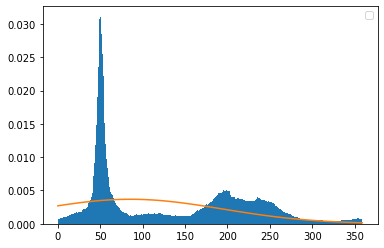

In [ ]:
#@title :try inputting estimates lm method:
from locale import MON_2
import pandas as pd
import numpy as np
import sys
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import scipy.optimize as optimize
myCol='zeroTo360'
#fileName='alphaHelicesFilteredOut.merged.csv'
myBins=360
def fitGMM(fileName, colName=myCol):
    df = pd.read_csv(fileName)
    gmm = GaussianMixture(n_components=2)
    gmm.fit(df[[colName]])
    mu1, mu2 = gmm.means_.flatten()
    sigma1, sigma2 = np.sqrt(gmm.covariances_.flatten())
    plt.hist(df[colName], bins=myBins, density=True)
    x = np.linspace(df[colName].min(), df[colName].max(), 100)
    plt.plot(x, np.exp(-0.5 * (x - mu1)**2 / sigma1**2) / (sigma1 * np.sqrt(2 * np.pi)), label='Distribution 1')
    plt.plot(x, np.exp(-0.5 * (x - mu2)**2 / sigma2**2) / (sigma2 * np.sqrt(2 * np.pi)), label='Distribution 2')
    plt.legend()
    plt.savefig("monday.hist.png")
    print('A: mean={:.2f}, std={:.2f}'.format(mu1, sigma1))
    print('B: mean={:.2f}, std={:.2f}'.format(mu2, sigma2))
    if mu1 > mu2:
      mu=mu1;sigma=sigma1
    else:
      mu=mu2;sigma=sigma2
    return mu,sigma


def fitPeak(fileName, mu_init, sigma_init, colName=myCol):
    df = pd.read_csv(fileName)
    hist, bins = np.histogram(df[colName], bins=myBins, density=True)
    bin_centers = (bins[1:] + bins[:-1]) / 2

    def Gaussian(x, mu, sigma):
        return np.exp(-0.5 * (x - mu)**2 / sigma**2) / (sigma * np.sqrt(2 * np.pi))

    def Gaussian_residuals(params, x, y):
        mu, sigma = params
        return y - Gaussian(x, mu, sigma)

    params_init = [mu_init, sigma_init]
    params_opt, params_cov = optimize.leastsq(Gaussian_residuals, params_init, args=(bin_centers, hist))
    mu_opt, sigma_opt = params_opt

    plt.hist(df[colName], bins=myBins, density=True)
    x = np.linspace(df[colName].min(), df[colName].max(), 100)
    plt.plot(x, Gaussian(x, mu_opt, sigma_opt))
    plt.legend()
    plt.savefig("levenberg-marquardt.hist.png")
    print(f'Optimized Gaussian: mu={mu_opt:.2f}, sigma={sigma_opt:.2f}')


####
if __name__ == "__main__":
    #fileName = sys.argv[1] if len(sys.argv) > 1 else "data.csv"
    ##mu, sigma = fitGMM(inputFile)
    #fitPeak(fileName, mu, sigma)
    fitPeak(inputFile, 50, 6)

    print('initial guess mu:',mu,' and sigma:',sigma)


In [ ]:
#@title filter data based on parameters :
import pandas as pd

def filterData(inputFile, lower_bound, upper_bound):
    """
    Filters out data from a dataframe below the lower bound and above the upper bound
    and saves the filtered dataframe to a new file with the prefix "raw_filtered_".

    Args:
    - inputFile (str): Path to input csv file
    - lower_bound (float): Lower bound value
    - upper_bound (float): Upper bound value

    Returns:
    - filtered_df (pandas.DataFrame): Filtered dataframe
    """
    # Read in csv file
    df = pd.read_csv(inputFile)

    # Subset dataframe to rows within bounds
    filtered_df = df[(df['zeroTo360'] >= lower_bound) & (df['zeroTo360'] <= upper_bound)]

    # Save filtered dataframe to new csv file with prefix "raw_filtered_"
    outputFile = 'raw_filtered_' + inputFile
    filtered_df.to_csv(outputFile, index=False)

    # Return filtered dataframe
    return filtered_df

#inputFile='derby.second.sampled.b.csv'
inputFile='betaCalcInput.csv'
filtered_df = filterData(inputFile, 100, 250)


FileNotFoundError: ignored

In [ ]:
import pandas as pd

def subtractTwoStd(inputFile, mean, std):
    """
    Subtracts all rows within 2 standard deviations of the mean and saves to new csv file.

    Args:
    - inputFile (str): Path to input csv file
    - mean (float): Mean value
    - std (float): Standard deviation value

    Returns:
    - None (saves new csv file)
    """
    # Read in csv file
    df = pd.read_csv(inputFile)

    # Calculate lower and upper bounds based on mean and std
    lower_bound = mean - 2*std
    upper_bound = mean + 2*std

    # Subset dataframe to rows within bounds and subtract from mean
    df_subtracted = df[(df['zeroTo360'] >= lower_bound) & (df['zeroTo360'] <= upper_bound)]
    df_subtracted['zeroTo360'] = df_subtracted['zeroTo360'] - mean

    # Save to new csv file with subtracted_ prefix
    outputFile = 'subtracted_' + inputFile
    df_subtracted.to_csv(outputFile, index=False)

import pandas as pd

def subtractOneStd(inputFile, mean, std):
    """
    Subtracts all rows within 1 standard deviation of the mean and saves to new csv file.

    Args:
    - inputFile (str): Path to input csv file
    - mean (float): Mean value
    - std (float): Standard deviation value

    Returns:
    - None (saves new csv file)
    """
    # Read in csv file
    df = pd.read_csv(inputFile)

    # Calculate lower and upper bounds based on mean and std
    lower_bound = mean - 3*std
    upper_bound = mean + 3*std

    # Subset dataframe to rows within bounds and subtract from mean
    df_subtracted = df[(df['zeroTo360'] < lower_bound) | (df['zeroTo360'] > upper_bound)]
    df_subtracted['zeroTo360'] = df_subtracted['zeroTo360'] - mean

    # Save to new csv file with subtracted_ prefix
    outputFile = 'subtracted_' + inputFile
    df_subtracted.to_csv(outputFile, index=False)


#subtractTwoStd('derby.second.sampled.b.csv', 49, 15)

subtractOneStd('derby.second.sampled.b.csv', 49, 15)

In [ ]:
import pandas as pd
import numpy as np
import sys
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import scipy.optimize as optimize
myCol='zeroTo360'
fileName='subtracted_derby.second.sampled.b.csv'
#def fitGMM(fileName, colName='zeroTo360'):
def fitGMM(fileName, colName=myCol):
    df = pd.read_csv(fileName)
    gmm = GaussianMixture(n_components=2)
    gmm.fit(df[[colName]])
    mu1, mu2 = gmm.means_.flatten()
    sigma1, sigma2 = np.sqrt(gmm.covariances_.flatten())
    plt.figure()
    plt.hist(df[colName], bins=360, density=False)
    x = np.linspace(df[colName].min(), df[colName].max(), 100)
    plt.plot(x, np.exp(-0.5 * (x - mu1)**2 / sigma1**2) / (sigma1 * np.sqrt(2 * np.pi)), label='Distribution 1')
    plt.plot(x, np.exp(-0.5 * (x - mu2)**2 / sigma2**2) / (sigma2 * np.sqrt(2 * np.pi)), label='Distribution 2')
    #plt.legend()
    plt.savefig("monday.hist.png")
    print('A: mean={:.2f}, std={:.2f}'.format(mu1, sigma1))
    print('B: mean={:.2f}, std={:.2f}'.format(mu2, sigma2))
    if mu1 < mu2:
      mu=mu1;sigma=sigma1
    else:
      mu=mu2;sigma=sigma2
    return mu,sigma

def fitPeak(fileName, colName=myCol):
    df = pd.read_csv(fileName)
    hist, bins = np.histogram(df[colName], bins=360, density=False)
    bin_centers = (bins[1:] + bins[:-1]) / 2

    def Gaussian(x, mu, sigma):
        return np.exp(-0.5 * (x - mu)**2 / sigma**2) / (sigma * np.sqrt(2 * np.pi))

    def Gaussian_residuals(params, x, y):
        mu, sigma = params
        return y - Gaussian(x, mu, sigma)

    mu_init = bin_centers[np.argmax(hist)]
    sigma_init = np.std(df[colName])

    params_init = [mu_init, sigma_init]
    #params_opt, params_cov = optimize.leastsq(Gaussian_residuals, params_init, args=(bin_centers, hist))
    params_opt, params_cov = optimize.leastsq(Gaussian_residuals, params_init, args=(bin_centers, hist), maxfev=10000,method='lm')
    #params_opt, params_cov = optimize.leastsq(Gaussian_residuals, params_init, args=(bin_centers, hist), max_nfev=1000)

    mu_opt, sigma_opt = params_opt

    plt.figure()
    plt.hist(df[colName], bins=360, density=False)
    x = np.linspace(df[colName].min(), df[colName].max(), 100)
    plt.plot(x, Gaussian(x, mu_opt, sigma_opt), label='Fitted Gaussian')
    #plt.legend()
    plt.savefig("levenberg-marquardtB.hist.png")
    print(f'Optimized Gaussian: mu={mu_opt:.2f}, sigma={sigma_opt:.2f}')



def fitPeakOrig(fileName, mu_init, sigma_init, colName=myCol):
    df = pd.read_csv(fileName)
    hist, bins = np.histogram(df[colName], bins=360, density=False)
    bin_centers = (bins[1:] + bins[:-1]) / 2

    def Gaussian(x, mu, sigma):
        return np.exp(-0.5 * (x - mu)**2 / sigma**2) / (sigma * np.sqrt(2 * np.pi))

    def Gaussian_residuals(params, x, y):
        mu, sigma = params
        return y - Gaussian(x, mu, sigma)

    params_init = [mu_init, sigma_init]
    params_opt, params_cov = optimize.leastsq(Gaussian_residuals, params_init, args=(bin_centers, hist))
    mu_opt, sigma_opt = params_opt

    plt.figure()
    plt.hist(df[colName], bins=360, density=False)
    x = np.linspace(df[colName].min(), df[colName].max(), 100)
    plt.plot(x, Gaussian(x, mu_opt, sigma_opt), label='Fitted Gaussian')
    #plt.legend()
    plt.savefig("levenberg-marquardtA.hist.png")
    print(f'Optimized Gaussian: mu={mu_opt:.2f}, sigma={sigma_opt:.2f}')

if __name__ == "__main__":
    #fileName = sys.argv[1] if len(sys.argv) > 1 else "data.csv"

    #fileName='sample.csv'
    mu, sigma = fitGMM(fileName)
    fitPeakOrig(fileName, mu, sigma)
   # fitPeak(fileName)
    print('initial guess mu:',mu,' and sigma:',sigma)




In [ ]:
from locale import MON_2
import pandas as pd
import numpy as np
import sys
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import scipy.optimize as optimize
#myCol='circularDistances'
myCol='zeroTo360'
fileName='derby.second.sampled.b.csv'
#fileName='removed.data.sample.csv'
myBins=360
def fitGMM(fileName, colName=myCol):
    df = pd.read_csv(fileName)
    gmm = GaussianMixture(n_components=2)
    gmm.fit(df[[colName]])
    mu1, mu2 = gmm.means_.flatten()
    sigma1, sigma2 = np.sqrt(gmm.covariances_.flatten())
    plt.hist(df[colName], bins=myBins, density=True)
    x = np.linspace(df[colName].min(), df[colName].max(), 100)
    plt.plot(x, np.exp(-0.5 * (x - mu1)**2 / sigma1**2) / (sigma1 * np.sqrt(2 * np.pi)), label='Distribution 1')
    plt.plot(x, np.exp(-0.5 * (x - mu2)**2 / sigma2**2) / (sigma2 * np.sqrt(2 * np.pi)), label='Distribution 2')
    plt.legend()
    plt.savefig("monday.hist.png")
    print('A: mean={:.2f}, std={:.2f}'.format(mu1, sigma1))
    print('B: mean={:.2f}, std={:.2f}'.format(mu2, sigma2))
    if mu1 > mu2:
      mu=mu1;sigma=sigma1
    else:
      mu=mu2;sigma=sigma2
    return mu,sigma


def fitPeak(fileName, mu_init, sigma_init, colName=myCol):
    df = pd.read_csv(fileName)
    hist, bins = np.histogram(df[colName], bins=myBins, density=True)
    bin_centers = (bins[1:] + bins[:-1]) / 2

    def Gaussian(x, mu, sigma):
        return np.exp(-0.5 * (x - mu)**2 / sigma**2) / (sigma * np.sqrt(2 * np.pi))

    def Gaussian_residuals(params, x, y):
        mu, sigma = params
        return y - Gaussian(x, mu, sigma)

    params_init = [mu_init, sigma_init]
    params_opt, params_cov = optimize.leastsq(Gaussian_residuals, params_init, args=(bin_centers, hist))
    mu_opt, sigma_opt = params_opt

    plt.hist(df[colName], bins=myBins, density=True)
    x = np.linspace(df[colName].min(), df[colName].max(), 100)
    plt.plot(x, Gaussian(x, mu_opt, sigma_opt), label='Fitted Gaussian')
    plt.legend()
    plt.savefig("levenberg-marquardt.hist.png")
    print(f'Optimized Gaussian: mu={mu_opt:.2f}, sigma={sigma_opt:.2f}')


####
if __name__ == "__main__":
    #fileName = sys.argv[1] if len(sys.argv) > 1 else "data.csv"
    mu, sigma = fitGMM(fileName)
    #fitPeak(fileName, mu, sigma)
    fitPeak(fileName, 180, 20)

    print('initial guess mu:',mu,' and sigma:',sigma)


'''
####
fileName = 'sample.csv'
mu, sigma = fitGMM(fileName)
print('initial guess mu:',mu,' and sigma:',sigma)
'''


In [ ]:
from locale import MON_2
import pandas as pd
import numpy as np
import sys
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import scipy.optimize as optimize
myCol='circularDistances'
myBins=180
def fitGMM(fileName, colName=myCol):
    df = pd.read_csv(fileName)
    gmm = GaussianMixture(n_components=2)
    gmm.fit(df[[colName]])
    mu1, mu2 = gmm.means_.flatten()
    sigma1, sigma2 = np.sqrt(gmm.covariances_.flatten())
    plt.hist(df[colName], bins=myBins, density=True)
    x = np.linspace(df[colName].min(), df[colName].max(), 100)
    plt.plot(x, np.exp(-0.5 * (x - mu1)**2 / sigma1**2) / (sigma1 * np.sqrt(2 * np.pi)), label='Distribution 1')
    plt.plot(x, np.exp(-0.5 * (x - mu2)**2 / sigma2**2) / (sigma2 * np.sqrt(2 * np.pi)), label='Distribution 2')
    plt.legend()
    plt.savefig("monday.hist.png")
    print('A: mean={:.2f}, std={:.2f}'.format(mu1, sigma1))
    print('B: mean={:.2f}, std={:.2f}'.format(mu2, sigma2))
    if mu1 < mu2:
      mu=mu1;sigma=sigma1
    else:
      mu=mu2;sigma=sigma2
    return mu,sigma


def fitPeak(fileName, mu_init, sigma_init, colName=myCol):
    df = pd.read_csv(fileName)
    hist, bins = np.histogram(df[colName], bins=myBins, density=True)
    bin_centers = (bins[1:] + bins[:-1]) / 2

    def Gaussian(x, mu, sigma):
        return np.exp(-0.5 * (x - mu)**2 / sigma**2) / (sigma * np.sqrt(2 * np.pi))

    def Gaussian_residuals(params, x, y):
        mu, sigma = params
        return y - Gaussian(x, mu, sigma)

    params_init = [mu_init, sigma_init]
    params_opt, params_cov = optimize.leastsq(Gaussian_residuals, params_init, args=(bin_centers, hist))
    mu_opt, sigma_opt = params_opt

    plt.hist(df[colName], bins=myBins, density=True)
    x = np.linspace(df[colName].min(), df[colName].max(), 100)
    plt.plot(x, Gaussian(x, mu_opt, sigma_opt), label='Fitted Gaussian')
    plt.legend()
    plt.savefig("levenberg-marquardt.hist.png")
    print(f'Optimized Gaussian: mu={mu_opt:.2f}, sigma={sigma_opt:.2f}')


####
if __name__ == "__main__":
    #fileName = sys.argv[1] if len(sys.argv) > 1 else "data.csv"

    mu, sigma = fitGMM(fileName)
    fitPeak(fileName, mu, sigma)
    print('initial guess mu:',mu,' and sigma:',sigma)


'''
####
fileName = 'sample.csv'
mu, sigma = fitGMM(fileName)
print('initial guess mu:',mu,' and sigma:',sigma)
'''



In [ ]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
import sys
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def gaussian(x, mu, sigma):
    return 1 / (np.sqrt(2 * np.pi) * sigma) * np.exp(-0.5 * ((x - mu) / sigma)**2)

def plotData(x, mu, sigma, bins=360):
    plt.hist(x, bins=bins, density=True)
    plt.plot(x, gaussian(x, mu, sigma), 'r', label='fit')
    plt.xlabel('X')
    plt.ylabel('Probability Density')
    plt.legend(loc='best')
    plt.show()

def main(fileName):
    data = pd.read_csv(fileName)
    x = data.iloc[:, -1]
    gmm = GaussianMixture(n_components=2)
    gmm.fit(x.reshape(-1, 1))
    mu1, mu2 = gmm.means_.flatten()
    sigma1, sigma2 = np.sqrt(gmm.covariances_.flatten())
    params, covariance = curve_fit(gaussian, x, x, method='lm', p0=[mu1, sigma1])
    mu = params[0]
    sigma = params[1]
    plotData(x, mu, sigma)

if __name__ == "__main__":
    #fileName = sys.argv[1] if len(sys.argv) > 1 else "data.csv"
    main(fileName)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm, mode

def fitGaussian(x, a, mu, sigma):
    return a * np.exp(-(x - mu)**2 / (2 * sigma**2))

def fitHistogramWithGaussian(fileName):
    # read data from CSV file
    df = pd.read_csv(fileName)
    dfNew = df['zeroTo360']
    data = dfNew.values.flatten()

    # plot histogram of the data
    n, bins, patches = plt.hist(data, bins=360, density=True, alpha=0.5)

    # find the mode and standard deviation of the highest peak
    modePeak = mode(data)[0][0]
    modeSigma = np.std(data[np.abs(data-modePeak) < 1])

    # fit Gaussian to highest peak
    x = np.linspace(modePeak - 4*modeSigma, modePeak + 4*modeSigma, 100)
    y = norm.pdf(x, modePeak, modeSigma)
    y += np.finfo(float).eps # add small constant to avoid zero values
    popt, _ = curve_fit(fitGaussian, x, y)

    # plot the fitted curve
    plt.plot(x, fitGaussian(x, *popt), 'r-', label='Gaussian Fit')

    plt.legend()
    plt.show()

if __name__ == '__main__':
    fitHistogramWithGaussian(fileName)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm, mode

def fitGaussian(x, a, mu, sigma):
    return a * np.exp(-(x - mu)**2 / (2 * sigma**2))

def fitHistogramWithGaussian(fileName):
    # read data from CSV file
    df = pd.read_csv(fileName)
    dfNew = df['zeroTo360']
    data = dfNew.values.flatten()

    # plot histogram of the data
    n, bins, patches = plt.hist(data, bins=360, density=True, alpha=0.5)

    # find the mode and standard deviation of the highest peak
    modePeak = mode(data)[0][0]
    modeSigma = np.std(data[np.abs(data-modePeak) < 1])

    # fit Gaussian to highest peak
    x = np.linspace(modePeak - 4*modeSigma, modePeak + 4*modeSigma, 100)
    y = norm.pdf(x, modePeak, modeSigma)
    y += np.finfo(float).eps # add small constant to avoid zero values
    popt, _ = curve_fit(fitGaussian, x, y)

    # plot the fitted curve
    plt.plot(x, fitGaussian(x, *popt), 'r-', label='Gaussian Fit')

    plt.legend()
    plt.show()

if __name__ == '__main__':
    fitHistogramWithGaussian(fileName)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm, mode

def fitGaussian(x, a, mu, sigma):
    return a * np.exp(-(x - mu)**2 / (2 * sigma**2))

def fitHistogramWithGaussian(fileName):
    # read data from CSV file
    df = pd.read_csv(fileName)
    dfNew = df['zeroTo360']
    data = dfNew.values.flatten()

    # plot histogram of the data
    n, bins, patches = plt.hist(data, bins=360, density=True, alpha=0.5)

    # find the mode and standard deviation of the highest peak
    modePeak = mode(data)[0][0]
    modeSigma = np.std(data[np.abs(data-modePeak) < 1])

    # fit Gaussian to highest peak
    x = np.linspace(modePeak - 4*modeSigma, modePeak + 4*modeSigma, 100)
    y = norm.pdf(x, modePeak, modeSigma)
    popt, _ = curve_fit(fitGaussian, x, y)

    # plot the fitted curve
    plt.plot(x, fitGaussian(x, *popt), 'r-', label='Gaussian Fit')

    plt.legend()
    plt.show()

if __name__ == '__main__':
    fileName = 'sample.csv'
    fitHistogramWithGaussian(fileName)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
from scipy.stats import norm, mode

def fitGaussian(p, x):
    a, x0, sigma = p
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

def errFunc(p, x, y):
    return y - fitGaussian(p, x)

def fitHistogramWithGaussian(fileName):
    # read data from CSV file
    df = pd.read_csv(fileName)
    dfNew = df['zeroTo360']
    data = dfNew.values.flatten()

    # plot histogram of the data
    n, bins, patches = plt.hist(data, bins=360, density=True, alpha=0.5)

    # find the mode and standard deviation of the highest peak
    modePeak = mode(data)[0][0]
    modeSigma = np.std(data[np.abs(data-modePeak) < 1])

    # fit Gaussian to highest peak
    x = np.linspace(modePeak - 4*modeSigma, modePeak + 4*modeSigma, 100)
    y = norm.pdf(x, modePeak, modeSigma)
    p0 = [1, modePeak, modeSigma]
    bounds = ([0, modePeak - 5 * modeSigma, 0], [np.inf, modePeak + 5 * modeSigma, np.inf])
    popt = least_squares(errFunc, p0, args=(x, y), bounds=bounds)

    # plot the fitted curve
    plt.plot(x, fitGaussian(popt.x, x), 'r-', label='Gaussian Fit')

    plt.legend()
    plt.show()

if __name__ == '__main__':
    fileName = 'sample.csv'
    fitHistogramWithGaussian(fileName)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import leastsq
from scipy.stats import norm, mode

def fitGaussian(p, x):
    a, x0, sigma = p
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

def errFunc(p, x, y):
    return y - fitGaussian(p, x)

def fitHistogramWithGaussian(fileName):
    # read data from CSV file
    df = pd.read_csv(fileName)
    dfNew = df['zeroTo360']
    data = dfNew.values.flatten()

    # plot histogram of the data
    n, bins, patches = plt.hist(data, bins=360, density=True, alpha=0.5)

    # find the mode and standard deviation of the highest peak
    modePeak = mode(data)[0][0]
    modeSigma = np.std(data[np.abs(data-modePeak) < 1])

    # fit Gaussian to highest peak
    x = np.linspace(modePeak - 4*modeSigma, modePeak + 4*modeSigma, 100)
    y = norm.pdf(x, modePeak, modeSigma)
    p0 = [1, modePeak, modeSigma]
    popt, _ = leastsq(errFunc, p0, args=(x, y), ftol=1.49012e-8)

    # plot the fitted curve
    plt.plot(x, fitGaussian(popt, x), 'r-', label='Gaussian Fit')

    plt.legend()
    plt.show()

if __name__ == '__main__':
    fileName = 'sample.csv'
    fitHistogramWithGaussian(fileName)


In [ ]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

if __name__ == '__main__':
    # read data from CSV file passed as command line argument
    #filename = sys.argv[1]
    filename='sample.csv'
    #df = pd.read_csv(filename, usecols=[-2])
    df=pd.read_csv(filename)
    dfNew=df['zeroTo360']
    data = dfNew.values.flatten()

    # plot histogram of the data
    plt.hist(data, bins=360, density=True, alpha=0.5)
    plt.show()


In [ ]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, mode
from scipy.optimize import leastsq


def findHighestPeakParams(data):
    # convert data to numeric type
    data = np.array(data, dtype=np.float64)

    # find the mode and standard deviation of the highest peak
    modePeak = mode(data)[0][0]
    modeSigma = np.std(data[np.abs(data-modePeak) < 1])
    return modePeak, modeSigma


def gaussian(p, x):
    a, x0, sigma = p
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))


def errfunc(p, x, y):
    return y - gaussian(p, x)


if __name__ == '__main__':
    # read data from CSV file passed as command line argument
    #filename = sys.argv[1]
    filename='sample.csv'
    df = pd.read_csv(filename)
    data = df.values.flatten()
    data = data.astype(str).tolist()

    # plot histogram of the data
    plt.hist(data, bins=360, density=True, alpha=0.5)

    # find the parameters of the highest peak
    modePeak, modeSigma = findHighestPeakParams(data)

    # fit a Gaussian curve to the data
    x = np.linspace(modePeak - 4*modeSigma, modePeak + 4*modeSigma, 100)
    y = norm.pdf(x, modePeak, modeSigma)
    p0 = [1, modePeak, modeSigma]
    popt, _ = leastsq(errfunc, p0, args=(x, y), ftol=1.49012e-8)

    # convert popt to numpy.ndarray
    popt = np.atleast_1d(popt)

    # plot the fitted curves
    plt.plot(x, gaussian(popt, x), 'b-', label='Gaussian Fit')
    plt.plot(x, norm.pdf(x, modePeak, modeSigma), 'r-', label='Normal Fit')

    plt.legend()
    plt.show()


In [ ]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, mode
from scipy.optimize import leastsq


def findHighestPeakParams(data):
    # find the mode and standard deviation of the highest peak
    modePeak = mode(data)[0][0]
    modeSigma = np.std(data[np.abs(data-modePeak) < 1])
    return modePeak, modeSigma


def gaussian(p, x):
    a, x0, sigma = p
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))


def errfunc(p, x, y):
    return y - gaussian(p, x)


if __name__ == '__main__':
    # read data from CSV file passed as command line argument
    #filename = sys.argv[1]
    filename='sample.csv'
    df = pd.read_csv(filename)
    data = df.values.flatten()
    data = data.astype(str).tolist()

    # plot histogram of the data
    plt.hist(data, bins=360, density=True, alpha=0.5)

    # find the parameters of the highest peak
    modePeak, modeSigma = findHighestPeakParams(data)

    # fit a Gaussian curve to the data
    x = np.linspace(modePeak - 4*modeSigma, modePeak + 4*modeSigma, 100)
    y = norm.pdf(x, modePeak, modeSigma)
    p0 = [1, modePeak, modeSigma]
    popt, _ = leastsq(errfunc, p0, args=(x, y), ftol=1.49012e-8)

    # convert popt to numpy.ndarray
    popt = np.atleast_1d(popt)

    # plot the fitted curves
    plt.plot(x, gaussian(popt, x), 'b-', label='Gaussian Fit')
    plt.plot(x, norm.pdf(x, modePeak, modeSigma), 'r-', label='Normal Fit')

    plt.legend()
    plt.show()


In [ ]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, mode
from scipy.optimize import leastsq


def findHighestPeakParams(data):
    # find the mode and standard deviation of the highest peak
    modePeak = mode(data)[0][0]
    modeSigma = np.std(data[np.abs(data-modePeak) < 1])
    return modePeak, modeSigma


def gaussian(p, x):
    a, x0, sigma = p
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))


def errfunc(p, x, y):
    return y - gaussian(p, x)


if __name__ == '__main__':
    # read data from CSV file passed as command line argument
    #filename = sys.argv[1]
    filename='sample.csv'
    df = pd.read_csv(filename)
    data = df.values.flatten()

    # plot histogram of the data
    plt.hist(data, bins=360, density=True, alpha=0.5)

    # find the parameters of the highest peak
    modePeak, modeSigma = findHighestPeakParams(data)

    # fit a Gaussian curve to the data
    x = np.linspace(modePeak - 4*modeSigma, modePeak + 4*modeSigma, 100)
    y = norm.pdf(x, modePeak, modeSigma)
    p0 = [1, modePeak, modeSigma]
    popt, _ = leastsq(errfunc, p0, args=(x, y), ftol=1.49012e-8)

    # convert popt to numpy.ndarray
    popt = np.atleast_1d(popt)

    # plot the fitted curves
    plt.plot(x, gaussian(popt, x), 'b-', label='Gaussian Fit')
    plt.plot(x, norm.pdf(x, modePeak, modeSigma), 'r-', label='Normal Fit')

    plt.legend()
    plt.show()
